In [2]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("smart_plant_monitoring_data.csv")

In [4]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df.head() #returns first 5 entries

,Timestamp,Soil_Moisture,Soil_Status,Pump_Status,Battery_Voltage
0,2025-06-23 00:00:00,774,Medium,OFF,3.98
1,2025-06-23 01:00:00,679,Medium,OFF,3.92
2,2025-06-23 02:00:00,797,Medium,OFF,3.91
3,2025-06-23 03:00:00,928,Medium,OFF,3.92
4,2025-06-23 04:00:00,664,Medium,OFF,3.99


In [6]:
df.tail() #returns first 5 entries

,Timestamp,Soil_Moisture,Soil_Status,Pump_Status,Battery_Voltage
163,2025-06-29 19:00:00,576,Medium,OFF,3.91
164,2025-06-29 20:00:00,844,Medium,OFF,4.01
165,2025-06-29 21:00:00,761,Medium,OFF,3.93
166,2025-06-29 22:00:00,823,Medium,OFF,4.10
167,2025-06-29 23:00:00,984,Dry,ON,3.99


In [7]:
df.shape

(168, 5)

In [8]:
df.isnull().sum()

Timestamp          0
Soil_Moisture      0
Soil_Status        0
Pump_Status        0
Battery_Voltage    0
dtype: int64

In [9]:
df.dtypes

Timestamp           object
Soil_Moisture        int64
Soil_Status         object
Pump_Status         object
Battery_Voltage    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        168 non-null    object 
 1   Soil_Moisture    168 non-null    int64  
 2   Soil_Status      168 non-null    object 
 3   Pump_Status      168 non-null    object 
 4   Battery_Voltage  168 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ KB


In [11]:
data=df.groupby('Soil_Status')

In [12]:
df.head()

,Timestamp,Soil_Moisture,Soil_Status,Pump_Status,Battery_Voltage
0,2025-06-23 00:00:00,774,Medium,OFF,3.98
1,2025-06-23 01:00:00,679,Medium,OFF,3.92
2,2025-06-23 02:00:00,797,Medium,OFF,3.91
3,2025-06-23 03:00:00,928,Medium,OFF,3.92
4,2025-06-23 04:00:00,664,Medium,OFF,3.99


In [13]:
df.head()


,Timestamp,Soil_Moisture,Soil_Status,Pump_Status,Battery_Voltage
0,2025-06-23 00:00:00,774,Medium,OFF,3.98
1,2025-06-23 01:00:00,679,Medium,OFF,3.92
2,2025-06-23 02:00:00,797,Medium,OFF,3.91
3,2025-06-23 03:00:00,928,Medium,OFF,3.92
4,2025-06-23 04:00:00,664,Medium,OFF,3.99


In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [16]:
print("Dataset Summary:")
print(df.describe())

Dataset Summary:
                 Timestamp  Soil_Moisture  Battery_Voltage
count                  168     168.000000       168.000000
mean   2025-06-26 11:30:00     693.333333         4.007798
min    2025-06-23 00:00:00     307.000000         3.680000
25%    2025-06-24 17:45:00     597.750000         3.930000
50%    2025-06-26 11:30:00     698.500000         4.010000
75%    2025-06-28 05:15:00     778.750000         4.070000
max    2025-06-29 23:00:00    1023.000000         4.390000
std                    NaN     140.841809         0.098385


In [17]:
soil_counts = df['Soil_Status'].value_counts()
print("\nSoil Status Counts:")
print(soil_counts)


Soil Status Counts:
Soil_Status
Medium    161
Dry         6
Wet         1
Name: count, dtype: int64


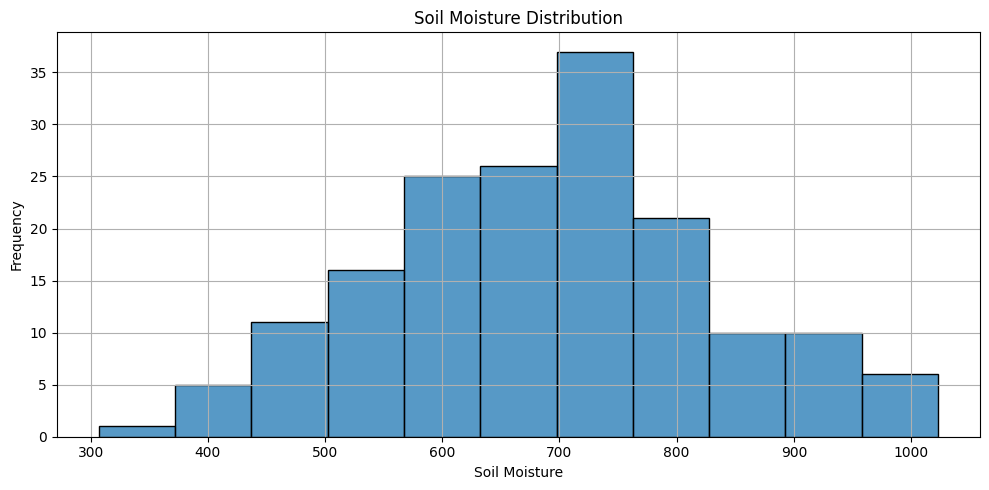

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Soil_Moisture'])
plt.title("Soil Moisture Distribution")
plt.xlabel("Soil Moisture")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2d5de68ab20>,
 'caps': [<matplotlib.lines.Line2D at 0x2d5de69b280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d5de68a760>],
 'medians': [<matplotlib.lines.Line2D at 0x2d5de69b9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d5de69bd30>],
 'means': []}

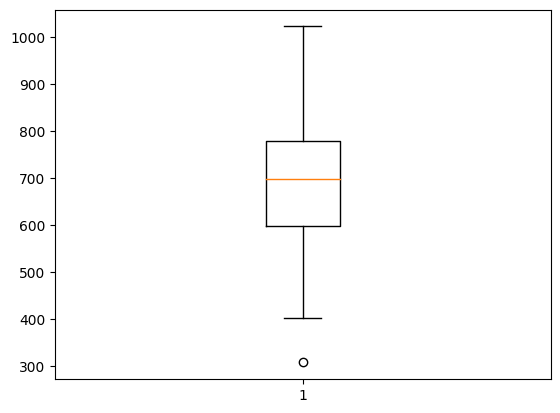

In [33]:
plt.boxplot(df['Soil_Moisture'])

<AxesSubplot:>

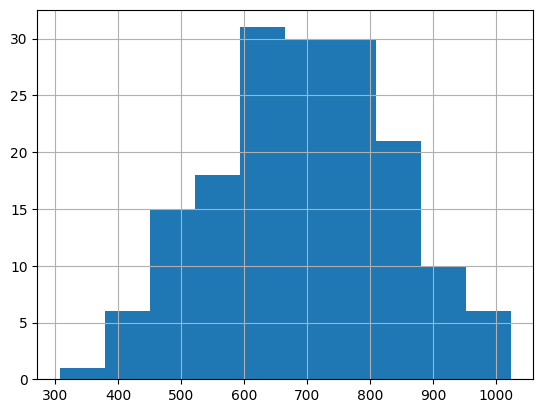

In [34]:
df['Soil_Moisture'].hist()

<AxesSubplot:>

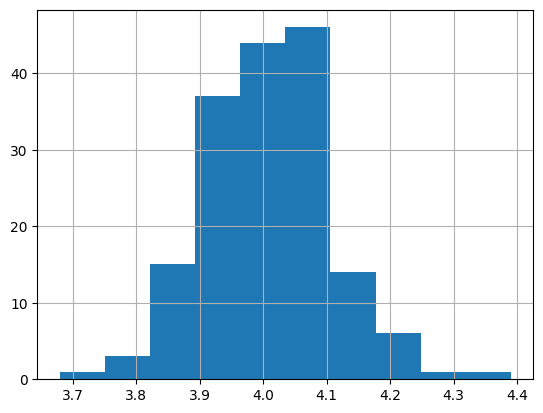

In [35]:
df['Battery_Voltage'].hist()

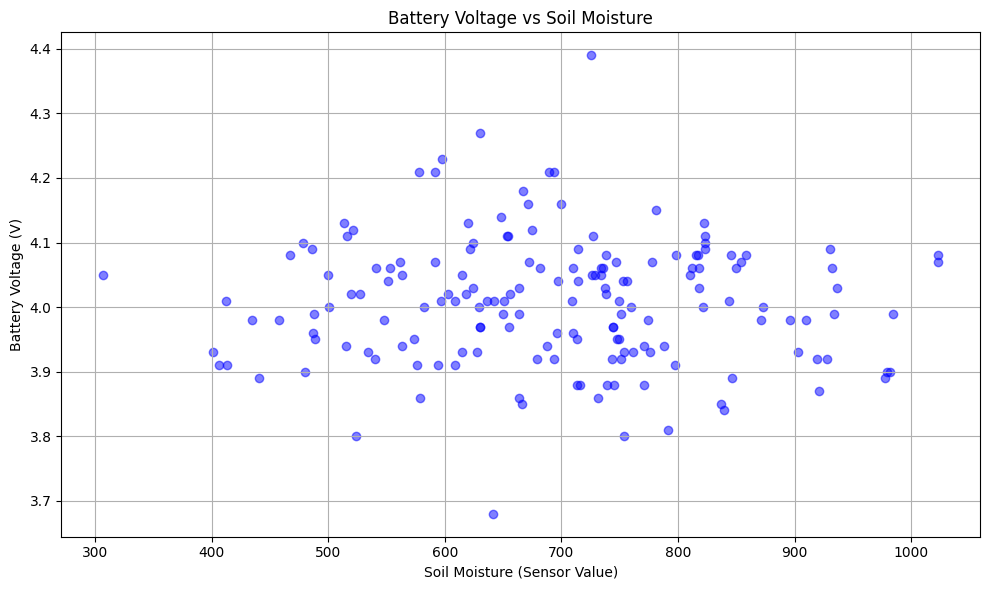

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Soil_Moisture'], df['Battery_Voltage'], alpha=0.5, color='blue')
plt.title('Battery Voltage vs Soil Moisture')
plt.xlabel('Soil Moisture (Sensor Value)')
plt.ylabel('Battery Voltage (V)')
plt.grid(True)
plt.tight_layout()
plt.show()

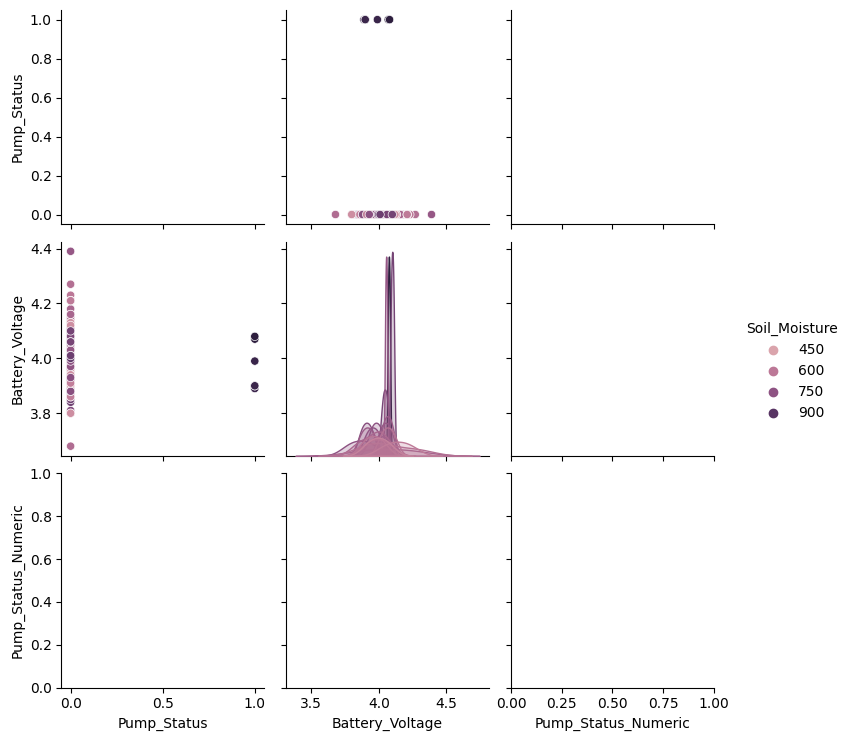

In [37]:
sns.pairplot(df, hue='Soil_Moisture')

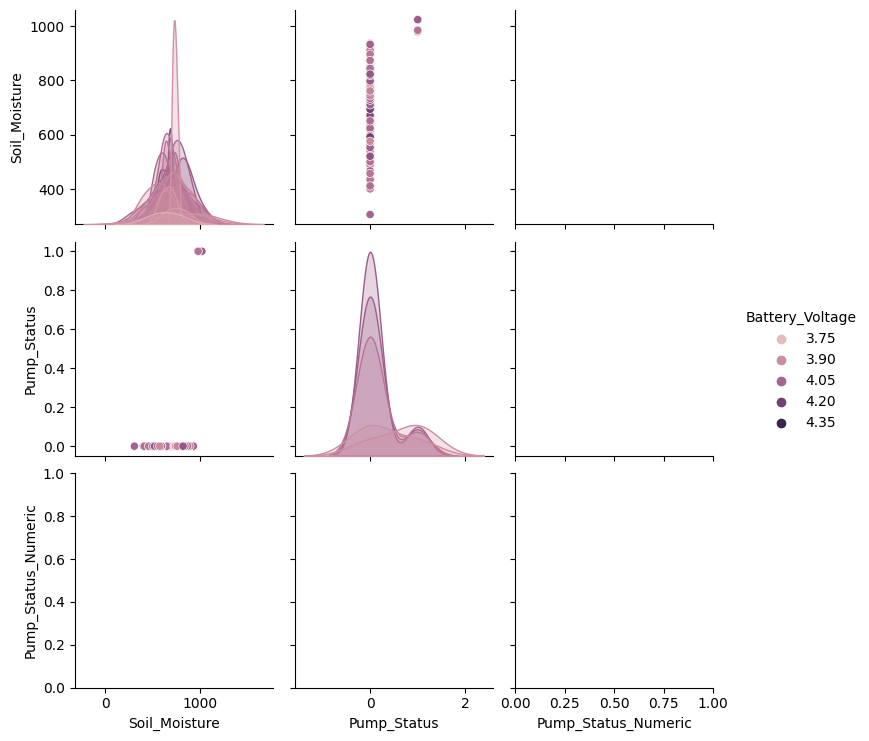

In [38]:
sns.pairplot(df, hue='Battery_Voltage')

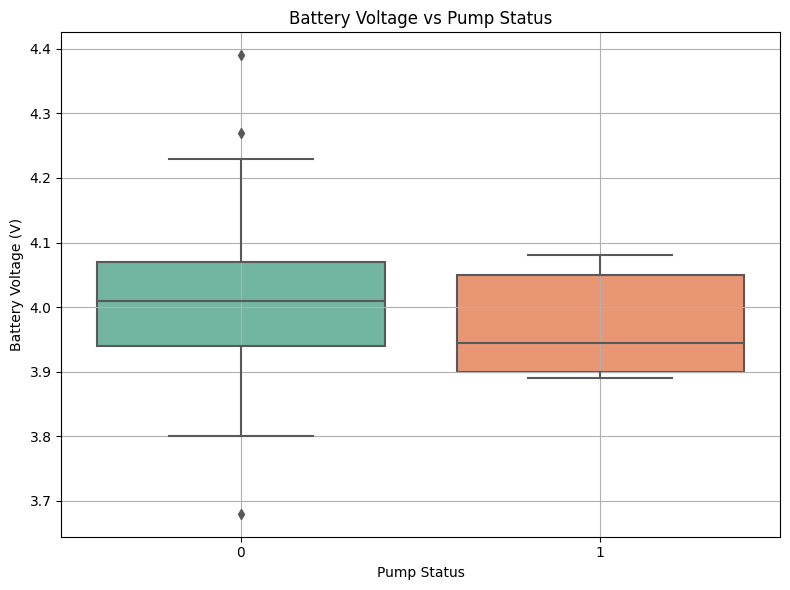

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pump_Status', y='Battery_Voltage', data=df, palette='Set2')
plt.title('Battery Voltage vs Pump Status')
plt.xlabel('Pump Status')
plt.ylabel('Battery Voltage (V)')
plt.grid(True)
plt.tight_layout()
plt.show()

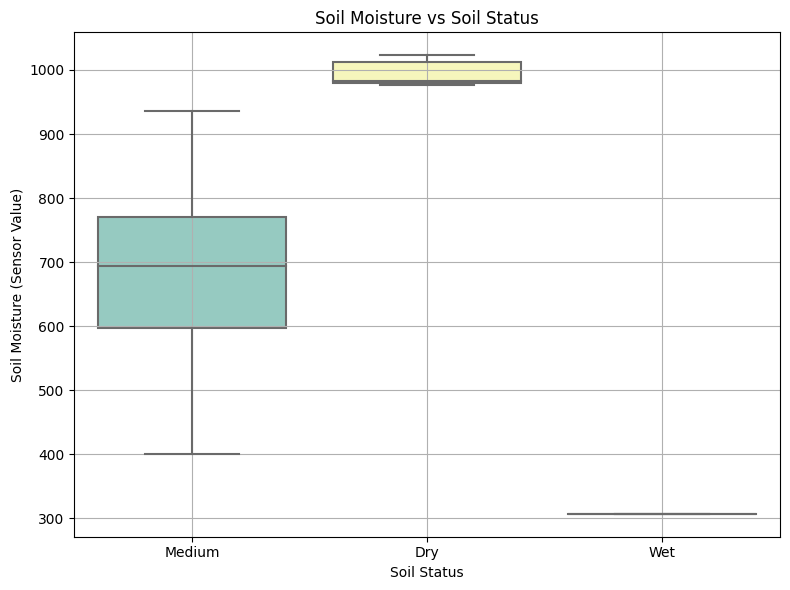

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Soil_Status', y='Soil_Moisture', data=df, palette='Set3')
plt.title('Soil Moisture vs Soil Status')
plt.xlabel('Soil Status')
plt.ylabel('Soil Moisture (Sensor Value)')
plt.grid(True)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Soil_Status', ylabel='Soil_Moisture'>

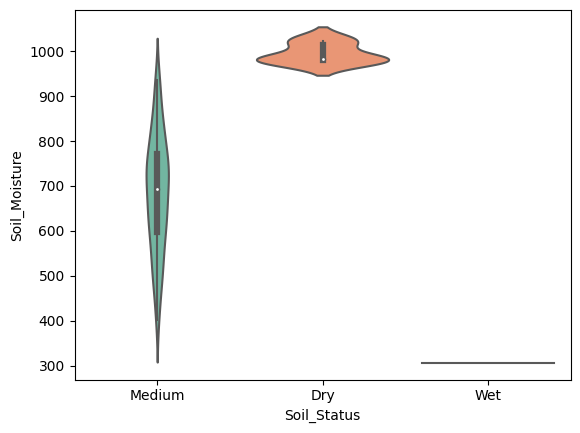

In [43]:
sns.violinplot(x='Soil_Status', y='Soil_Moisture', data=df, palette='Set2')

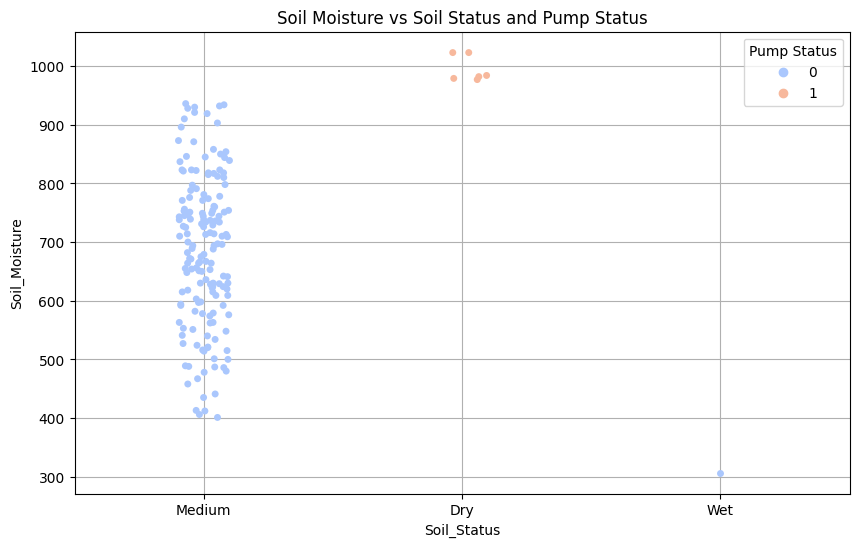

In [46]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Soil_Status', y='Soil_Moisture', hue='Pump_Status', data=df, jitter=True, palette='coolwarm')
plt.title('Soil Moisture vs Soil Status and Pump Status')
plt.legend(title='Pump Status')
plt.grid(True)
plt.show()

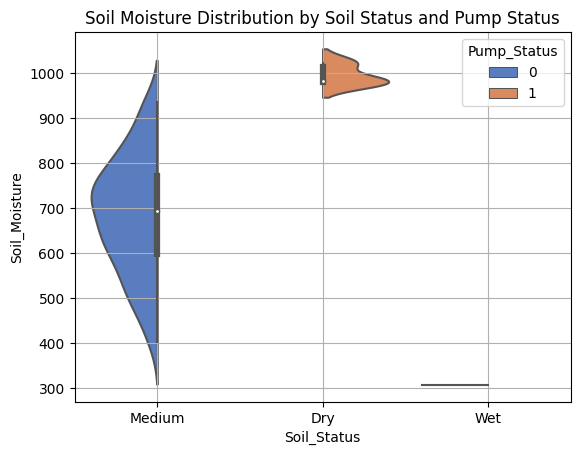

In [47]:
sns.violinplot(x='Soil_Status', y='Soil_Moisture', hue='Pump_Status', data=df, split=True, palette='muted')
plt.title('Soil Moisture Distribution by Soil Status and Pump Status')
plt.grid(True)
plt.show()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [50]:
le_soil = LabelEncoder()
le_pump = LabelEncoder()
df['Soil_Status_Code'] = le_soil.fit_transform(df['Soil_Status'])
df['Pump_Status_Code'] = le_pump.fit_transform(df['Pump_Status'])

Text(0.5, 0.92, '3D Plot: Soil Moisture vs Soil Status vs Pump Status')

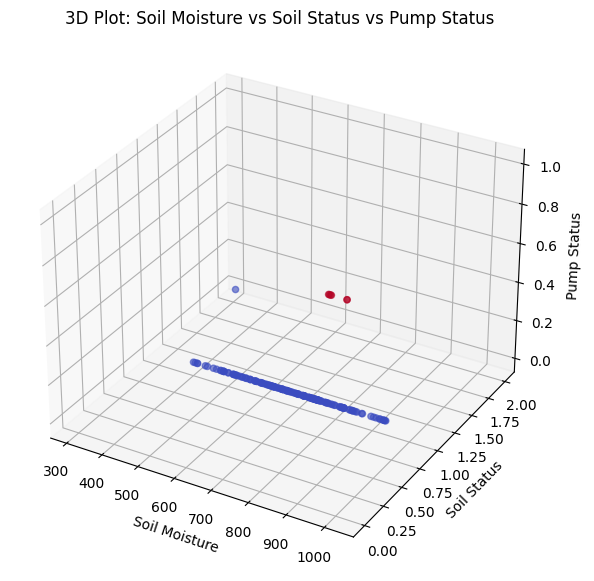

In [51]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Soil_Moisture'],
df['Soil_Status_Code'],
df['Pump_Status_Code'],
c=df['Pump_Status_Code'], cmap='coolwarm', alpha=0.6)

ax.set_xlabel('Soil Moisture')
ax.set_ylabel('Soil Status')
ax.set_zlabel('Pump Status')
ax.set_title('3D Plot: Soil Moisture vs Soil Status vs Pump Status')

In [52]:
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(le_soil.inverse_transform([0, 1, 2]))
ax.set_zticks([0, 1])
ax.set_zticklabels(le_pump.inverse_transform([0, 1]))

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [53]:
pd.crosstab(df['Soil_Status'], df['Pump_Status'])

Pump_Status,0,1
Soil_Status,,
Dry,0,6
Medium,161,0
Wet,1,0
